In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [71]:
%matplotlib inline

In [72]:
ale_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")

In [73]:
recon_df = pd.read_csv("../Data/Growth_data/Reconstructions/Reconstruction_replicate_growth.csv", index_col=0)

comp_list = ["HMDA", "PUTR", "12PD", "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]
for comp in comp_list:
    recon_df = recon_df[~recon_df["strain"].str.startswith(comp)]
    
recon_df["replicate"] = recon_df["strain"]
recon_df["strain"] = recon_df["replicate"].map(lambda x: x[:-2])

In [74]:
# incorrect testing condition

In [75]:
for i in recon_df[recon_df.strain=='ypjA_mprA_nadR_yhjK'].index:
    print(i)
    recon_df.loc[i,'compound']='coumarate'

818
834
839


In [76]:
plt.rcParams['svg.fonttype'] = 'none'

In [77]:
#Remove measurements of less-relevant target genes

In [78]:
recon_df=recon_df.drop(index=recon_df[recon_df.strain=='metJ-lg'].index)
recon_df=recon_df.drop(index=recon_df[recon_df.strain=='metJ-sm'].index)
recon_df=recon_df.drop(index=recon_df[recon_df.strain=='stfE'].index)
recon_df=recon_df.drop(index=recon_df[recon_df.strain=='rzpD'].index)
recon_df=recon_df.drop(index=recon_df[recon_df.strain=='cheR'].index)

In [81]:
recon_df_drop = recon_df.copy()

for i in recon_df_drop.index:
    checker = 0
    for j in less_frequency_mutation:
        if j in recon_df_drop.loc[i,'strain']:
            checker=1
    if checker==1:
        recon_df_drop=recon_df_drop.drop(index=i)
            

In [82]:
total_tested_gene = pd.DataFrame(recon_df['strain'])

In [83]:
len(set(total_tested_gene.strain.str.split('_', expand=True)[0].unique()).union(set(total_tested_gene.strain.str.split('_', expand=True)[1].unique())).union(
set(total_tested_gene.strain.str.split('_', expand=True)[2].unique())))-2 #MG1655 and none

55

In [84]:
#Remove errorneous growth rate

recon_df=recon_df.drop(index=[1031, 1040, 1041, 1030, 1034, 1045, 393, 672])

In [85]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

In [86]:
total_comp_order = [
    "1,2-propanediol", "2,3-butanediol","glutarate", "adipate", "putrescine",  "HMDA", 
    "isobutyrate", "coumarate",  "butanol", "octanoate" , "hexanoate"
]

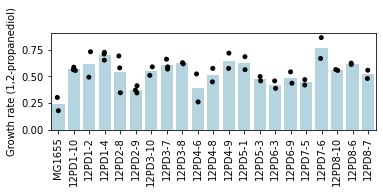

In [87]:
comp_order=["1,2-propanediol"]
plt.figure(figsize=[10, 13])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = ale_df[ale_df["compound"] == comp]
    comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="growth_rate", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90)
    sbn.stripplot(x="strain", y="growth_rate", data=comp_df, color="black")
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)))

plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.pdf")

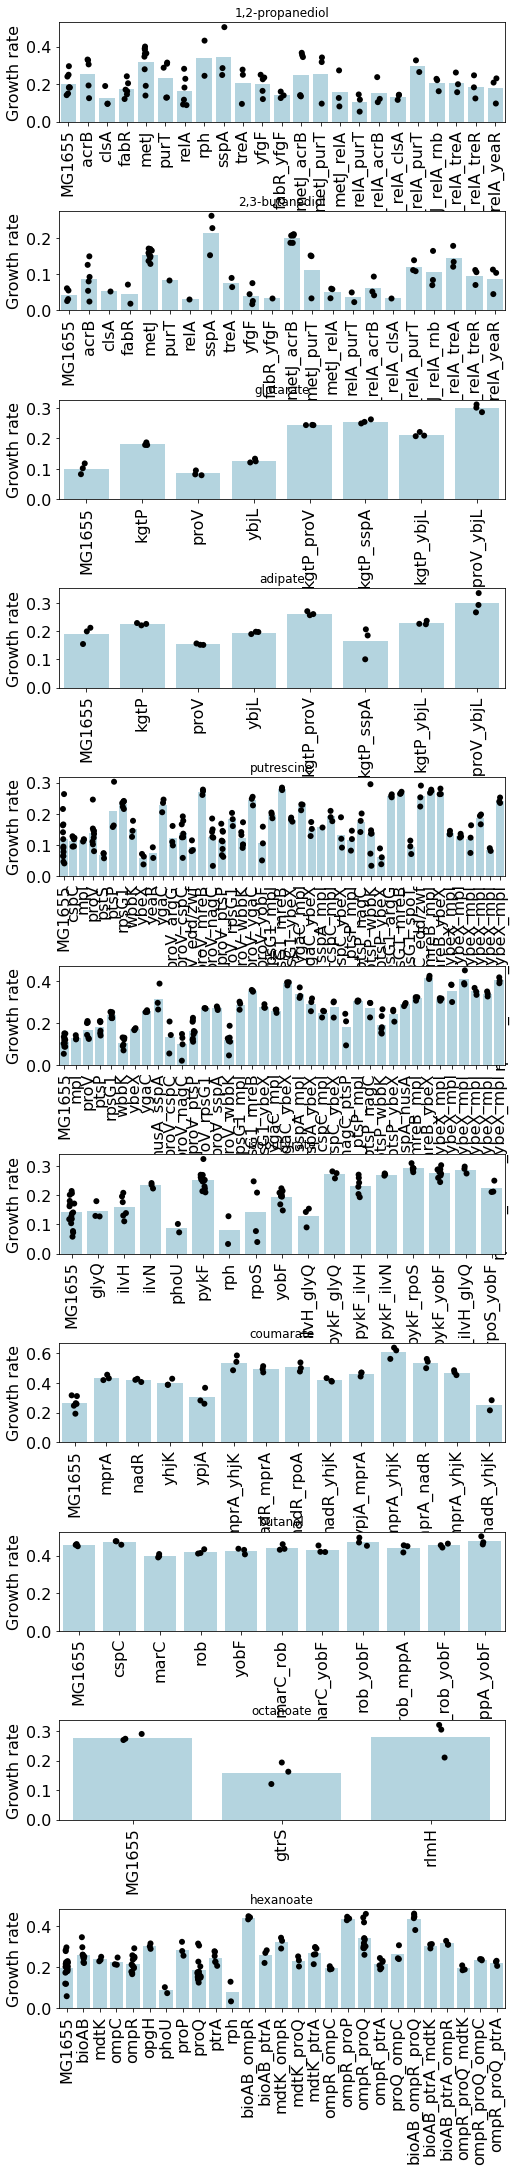

In [88]:
comp_order=total_comp_order

plt.figure(figsize=[8, 40])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    comp_df = comp_df[comp_df["slope"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])
    
    #Re-ordering strains
    for i in comp_df.index:
        if comp_df.loc[i, 'strain']=="MG1655":
            comp_df.loc[i, 'order']=int(0)
        else:
            comp_df.loc[i,'order']=comp_df.loc[i, 'strain'].count('_')+1
    
    comp_df=comp_df.sort_values(by=['order','strain'])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=16)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=6)
    plt.xlabel("")
    plt.ylabel("Growth rate", fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(comp)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance_removed.svg")